In [950]:
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import pairwise_distances
from tensorflow.keras.datasets import mnist
from scipy import stats as scs
%config InlineBackend.figure_format = 'retina'

# The Curse of Dimensionality

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

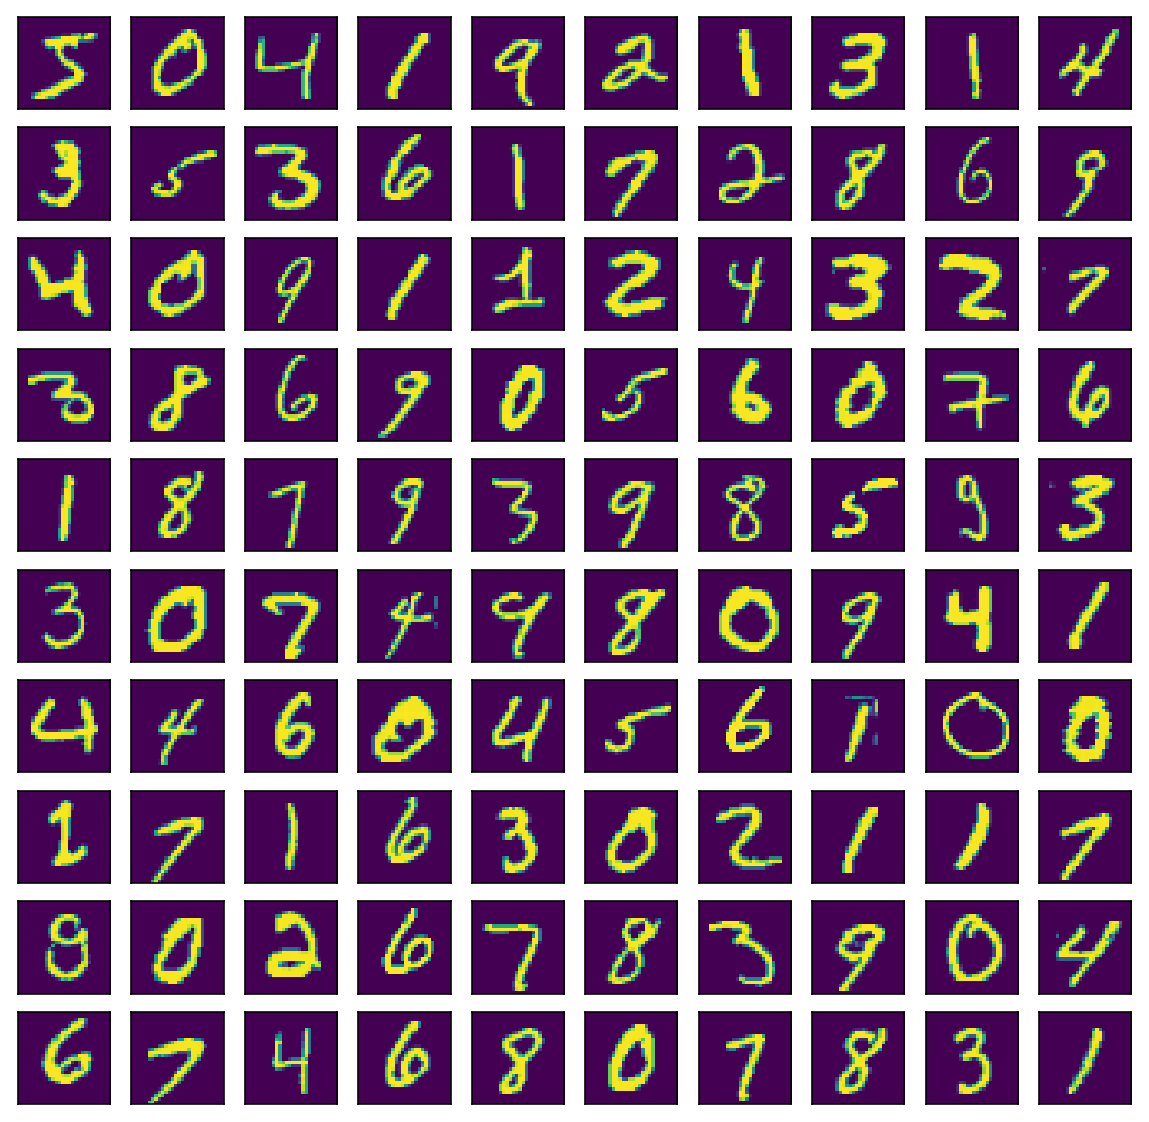

In [4]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
k = 0
for i in range(10):
    for j in range(10):
        ax = axs[i][j]
        ax.set_xticks([])
        ax.set_yticks([])
        
        ax.imshow( X_train[k] )
        k += 1

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
knn = KNeighborsClassifier()

In [7]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [8]:
knn.fit( X_train_flat, y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

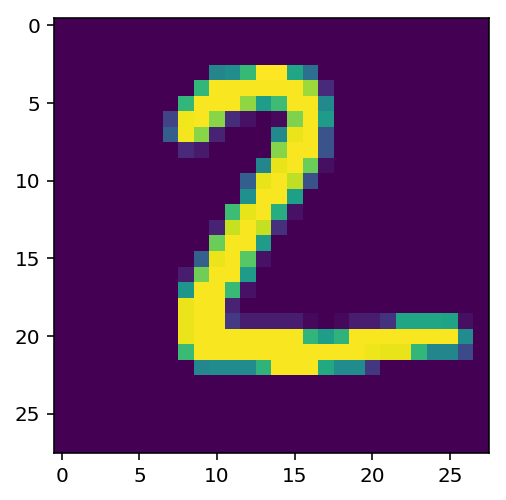

In [9]:
sample_ix = 1

plt.imshow( X_test[sample_ix] )

In [10]:
dist, idx = knn.kneighbors(X_test_flat[sample_ix:sample_ix+1], n_neighbors=100)
idx = idx[0]

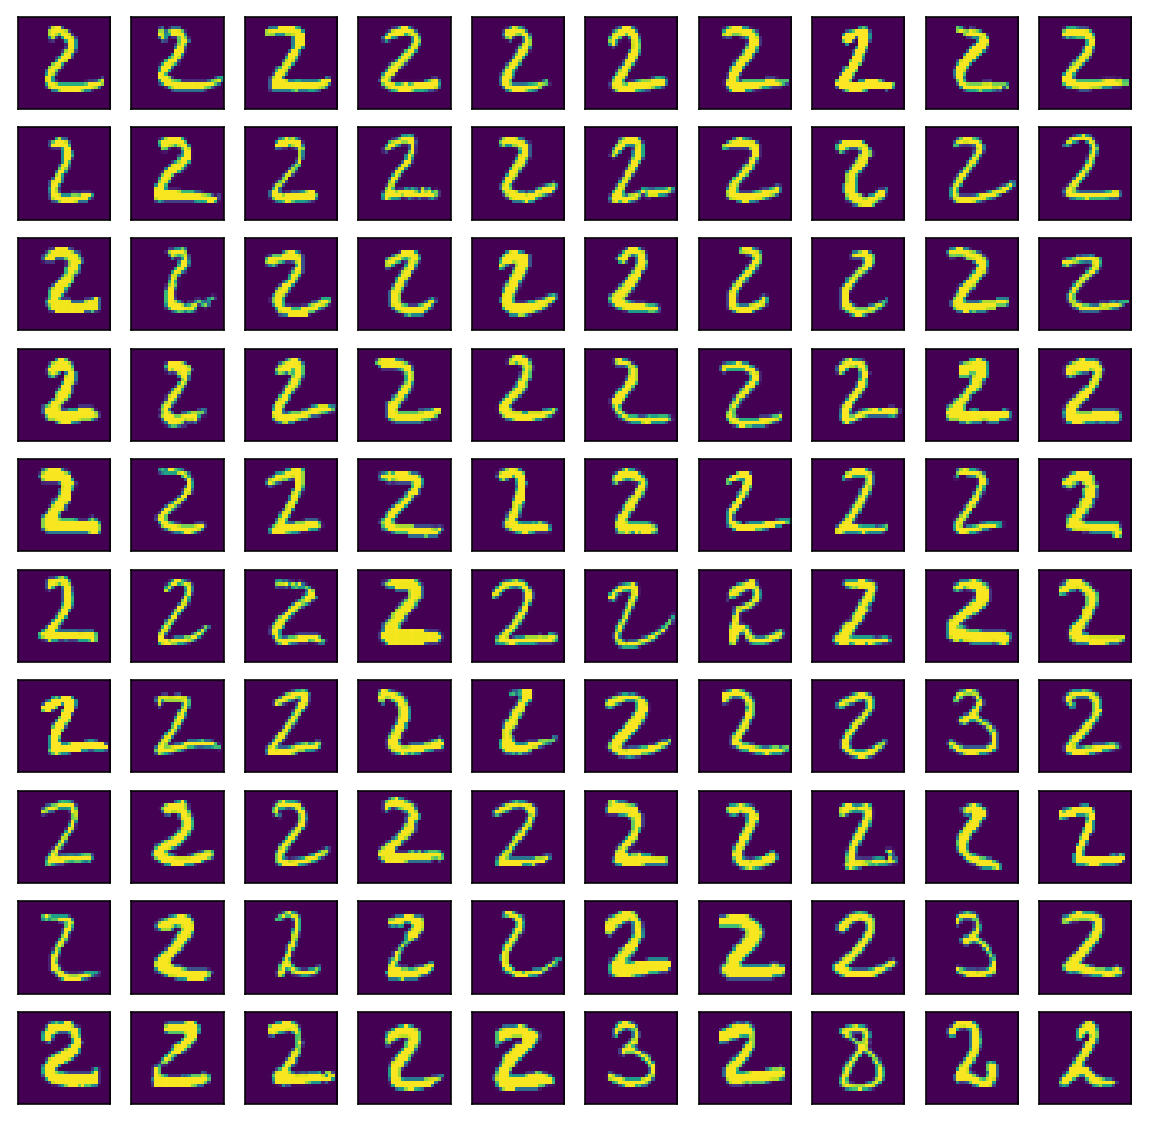

In [11]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
k = 0
for i in range(10):
    for j in range(10):
        ax = axs[i][j]
        ax.set_xticks([])
        ax.set_yticks([])
        
        ax.imshow( X_train[ idx[k] ] )
        k += 1

In [15]:
%time yhat = knn.predict(X_test_flat[0:30])

CPU times: user 1.97 s, sys: 12.7 ms, total: 1.99 s
Wall time: 2.01 s


In [27]:
f"will take {(2.0 * len(y_test)/30) / 60:0.3} minutes to complete"

'will take 11.1 minutes to complete'

In [32]:
from scipy.signal import convolve2d

In [35]:
import scipy

In [45]:
from scipy.ndimage import zoom

In [67]:
X_train_half = zoom(X_train, (1, 0.5, 0.5))
X_test_half = zoom(X_test, (1, 0.5, 0.5))

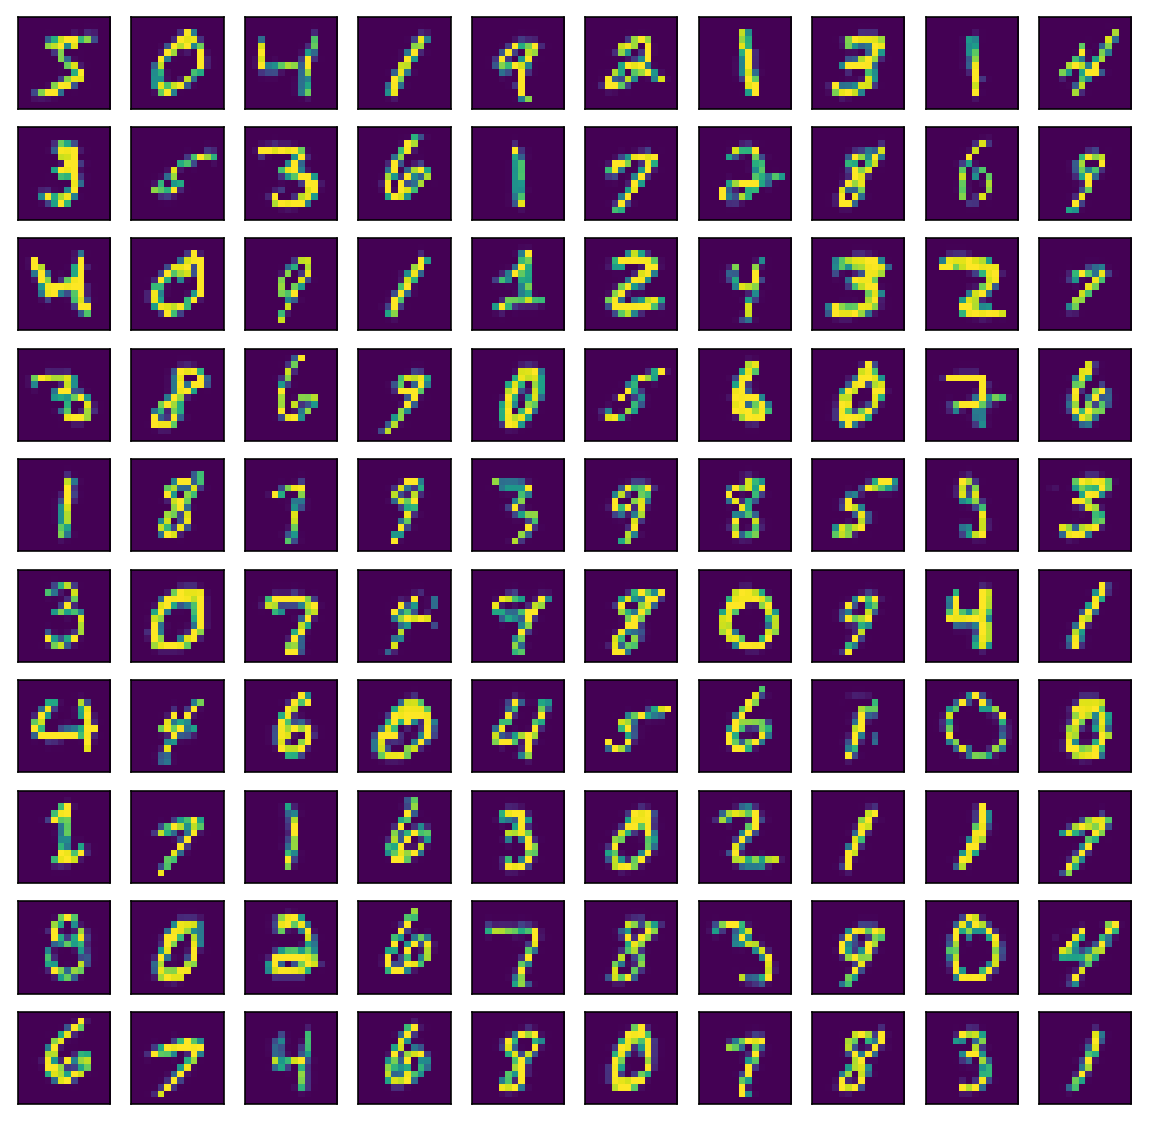

In [68]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
k = 0
for i in range(10):
    for j in range(10):
        ax = axs[i][j]
        ax.set_xticks([])
        ax.set_yticks([])
        
        ax.imshow( X_train_half[k] )
        k += 1

In [69]:
knn = KNeighborsClassifier()

In [73]:
X_train_half_flat = X_train_half.reshape(X_train_half.shape[0], -1)
X_test_half_flat = X_test_half.reshape(X_test_half.shape[0], -1)

In [75]:
knn.fit( X_train_half_flat, y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [79]:
%time knn.predict(X_test_half_flat[0:30])

CPU times: user 642 ms, sys: 4.32 ms, total: 646 ms
Wall time: 656 ms


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1], dtype=uint8)

## NLP

In [289]:
articles = pd.read_csv("data/articles.csv")

In [290]:
def ord_featurization(text):
    return np.array([ord(c) for c in text])

In [291]:
n_features = 2048
ord_features = articles.content.str.pad(n_features, side="right").map(ord_featurization)
X = np.stack( ord_features.map( lambda x: x[:n_features]) )

In [296]:
print( articles.iloc[0].content[0:1024] )












“Hey,” the man on the phone said. “Are you still coming tonight?”        


It took a moment for me to realize that he was calling from Distilled to confirm my dinner reservation.        
“Yes,” I replied. “Cool,” he said, and sounded as if he meant it.        
Distilled opened in June on the corner of Franklin Street and West Broadway in TriBeCa, the former home of Drew Nieporent’s Layla and Centrico. The belly dancers and the frozen-margarita machine are gone, but a certain effervescence remains. So does Mr. Nieporent, hovering in the background as guru to Distilled’s owners, the first-time restaurateur Nick Iovacchini and Shane Lyons, the 25-year-old chef.        
The space is blandly handsome, with dark woods and charcoal banquettes, breathlessly high ceilings and quasi-medieval wheel chandeliers like crowns of fire. One side is devoted to the bar, where the drinks, by Benjamin Wood, are lady-killers, elegant with a knife twist. Occasionally 1980s mope rock shimmers from

In [297]:
dists = pairwise_distances(X)

In [298]:
close = sorted( zip( range(len(dists)), dists[0] ), key=lambda x:x[1] )[0:10]
close

[(0, 0.0),
 (953, 32620.069282575107),
 (942, 32682.478991043503),
 (25, 33561.86377423042),
 (81, 33651.701219997776),
 (285, 33671.16563173898),
 (262, 33712.63045210207),
 (890, 33713.52184213331),
 (306, 33717.88606956255),
 (438, 33725.42388169495)]

In [299]:
print( articles.iloc[close[1][0]].content[0:1024] )






WASHINGTON — A little more than 24 hours after an IT contractor gunned down a dozen workers at the Washington Navy Yard, the CEO of the company he worked for sent an email to Navy Secretary Ray Mabus saying he has the experience to help the military improve its security.         
The email from The Experts chief Thomas Hoshko, which included descriptions of his background and expertise, stunned some Navy leaders still reeling from the shooting rampage Monday that left 13 people dead, including the gunman, former Navy reservist Aaron Alexis.        
And it fueled concern over what defense officials believe may have been failures by the company to alert the military about Alexis' apparent mental health problems.        
In the email, which was obtained by The Associated Press, Hoshko said he was "dramatically" affected by the incident and "my heart and prayers go out to the families and friends of those innocent victims." But the email quickly moves on, as Hoshko lays out his work e

In [337]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [360]:
article_text = articles.content.str.strip().str.lower()

In [361]:
X = TfidfVectorizer().fit_transform(article_text)

In [362]:
dists = pairwise_distances(X)

In [363]:
close = sorted( zip( range(len(dists)), dists[0] ), key=lambda x:x[1] )[0:10]
close

[(0, 0.0),
 (575, 1.1989082260916557),
 (421, 1.211418174624623),
 (229, 1.217631686426758),
 (604, 1.2213754930036422),
 (640, 1.2245220083086465),
 (233, 1.2300259414049537),
 (747, 1.2306268857398621),
 (241, 1.2314592014424983),
 (243, 1.2314592014424983)]

In [364]:
print( articles.iloc[close[1][0]].content[0:1024] )












Don’t go looking for fancy Italian at Osteria Cucina Rustica in Marlboro. Despite the imposing facade of this restaurant in a former bank, the fare is indeed rustic, as the name suggests. Flavors are simple.        


Quality is high, and most everything is made in-house. Much of what I sampled on two visits was well prepared — a main dish of risotto with delicate and juicy grilled shrimp, each grain separate and slightly al dente; exquisite branzino fillets, perfectly pan-seared and seasoned with butter, shallots, white wine, lemon and a sprinkle of capers, laid over a bed of beluga lentils; hearty hanger steak that was tender and delicious enough to continue eating past satiety.        
Service is old-school indulgent. We were led to our tables by young women; all the waiters were attentive men in lab-style white coats who paid attention to water and wine and apologized when the main courses took too long to arrive.        
Prices for such service, food quality and attenti

The closest article is still pretty arbitrary.

In [365]:
from sklearn.decomposition import PCA

In [366]:
X_pca = PCA(n_components=20).fit_transform(X.todense())

In [367]:
dists = pairwise_distances(X_pca)

In [368]:
close = sorted( zip( range(len(dists)), dists[0] ), key=lambda x:x[1] )[0:10]
close

[(0, 0.0),
 (3, 0.11371408359326951),
 (562, 0.12411004752777742),
 (834, 0.1277936960634234),
 (640, 0.13373371334122877),
 (604, 0.13749317330302002),
 (540, 0.14094334878372658),
 (814, 0.14358151507705375),
 (594, 0.14952379360992274),
 (575, 0.15203445850825945)]

In [370]:
print( articles.iloc[562].content[:1024].strip() )

At the sushi counter at Kura, there is no sentinel in white; no silent, coolly appraising overlord. Norihiro Ishizuka, 70, stands alone, wearing not a crisp chef’s coat but a samue, traditionally a monk’s work robe, that slouches at his waist like a dressing gown.        


He has a benevolent and slightly rakish air, with his faint pencil mustache and white-gray hair peeking out of the bottom of his cap. He nods and grins, already halfway to a laugh, and the meal has not yet begun.        
Outside, Kura’s East Village shopfront is austere: a blank wall crosshatched by the shadow of a fire escape, with no sign save a linen drape hanging in an archway, inked with an unfinished circle. Inside, 12 seats line a blond-wood counter. Delicate jazz chimes above.        
But this is not a shrine. Behind Mr. Ishizuka is exposed brick, and the rough edges seem to suit him. No glass cases separate him from diners; instead, fish is heaped unceremoniously in a wide shallow basket. Mr. Ishizuka hefts

In [379]:
newsdesks = articles[ (articles.news_desk=="Foreign") | (articles.news_desk=="Sports") ]

In [397]:
X = newsdesks.content.str.lower().str.strip()

In [398]:
y = (newsdesks.news_desk == "Foreign").astype(int)

In [399]:
from sklearn.model_selection import train_test_split

In [401]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [403]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [405]:
X_train = vectorizer.transform(X_train)

In [407]:
from sklearn.neighbors import KNeighborsClassifier

In [408]:
clf = KNeighborsClassifier()

In [409]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [411]:
yhat = clf.predict( vectorizer.transform(X_test) )

In [414]:
from sklearn.metrics import accuracy_score

In [415]:
accuracy_score(y_test, yhat)

0.96875

In [417]:
pca = PCA(n_components=20)

In [420]:
pca.fit(X_train.todense())

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [429]:
clf.fit( pca.transform( X_train.todense() ), y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [430]:
yhat = clf.predict( pca.transform( vectorizer.transform( X_test ).todense() ) )

In [433]:
accuracy_score(y_test, yhat)

1.0

## A deeply contrived example

A person has 100 personality boolean personality traits. You can have it, or not have it. Let's call them...

* $x_{i,1}$ : smart
* $x_{i,2}$ : sassy
* $x_{i,3}$ : regal
* $x_{i,4}$ : brave
* $x_{i,5}$ : euclitarian
* $x_{i,6}$ : fragilistic
* $x_{i,7}$ : thrombic
* $x_{i,8}$ : nondarian
* $x_{i,9}$ : lipsistic
* ...
* $x_{i,100}$ : hypsostic

Imagine that:
* A person can have a score on each personality characteristic ranging from 0 to 100. 
* The distribution is uniform.
* If someone has a greater than 50 score, they are considered "positive" for that personality trait.
* There is _no correlation_ between personality traits.

We're curious if someone **likes cookies**. The hidden model is that if someone is someone is smart or sassy **but not both**, then maybe they like cookies; we'll call that $y_{maybe}$. Then we ask if they're also regal. If they are either $y_{maybe}$ or regal **but not both**, then we will say that $y_{maybe}=true$. We repeat that process for every personality characteristic.

This odd scenario has nice properties:
* The independent variable is a deterministic function of the features.
  * Namely, it's $y_i = x_{i,1} \oplus x_{i,2} \oplus \ldots \oplus x_{i,n}$ (where $\oplus$ is the logical exclusive or operator.
* There are a large number of features.
* Every feature interacts with every other feature.
* The prevalance of the positive class is 0.5.
* There is no correlation between features.

In reality, similar situations - high-prevalance classes arising (mostly) deterministically from an interaction of a very large number of relatively independent features - are common in nature. For example:
 * Whether someone does well in school
 * Whether someone will die before turning 70
 * Whether someone likes thai food
 * Whether a business is profitable in the first year


In [598]:
# make an artificial data set

np.random.seed(42)

n_samples = 10000
n_features = 100
X = np.random.uniform( 100, size=(n_samples,n_features))
y = np.logical_xor.reduce( X>50, axis=1 )

In [599]:
X

array([[62.92052823,  5.87928367, 27.53259976, ..., 57.67343918,
        97.48350645, 89.31874873],
       [96.88851062, 36.99536928, 68.87875787, ..., 11.18608426,
        12.178444  , 22.79232096],
       [36.43886703, 91.67014347, 83.9987573 , ..., 78.63371828,
        38.33384289, 91.55060097],
       ...,
       [41.18213309, 49.7420848 , 79.33031372, ..., 21.687661  ,
         8.24714886, 70.18056032],
       [92.05505286,  2.10321256, 42.95292259, ..., 25.14297711,
        74.43270236, 50.96310162],
       [71.25008866, 29.02834355,  1.30134182, ..., 58.61087378,
        57.56154559,  7.98459376]])

In [600]:
y

array([ True, False, False, ..., False,  True, False])

In [601]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [602]:
knn = KNeighborsClassifier(n_neighbors=20)

In [603]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [604]:
yhat = knn.predict(X_test)

In [605]:
accuracy_score(y_test, yhat)

0.5088

Pretty terrible!!! Especially considering there is, in fact, a method for predicting the output with perfect accuracy:

In [606]:
yhat = np.logical_xor.reduce( X_test>50, axis=1 )

In [607]:
accuracy_score(y_test, yhat)

1.0

**What is going on??**



The first item from the test set:

In [612]:
x_0 = X_test[0]
x_0

array([81.86527537, 35.91048442, 46.36850854, 95.69829626, 94.90251328,
        3.88076327, 68.09804443,  6.5639366 , 43.44417968, 81.69683701,
       56.85286609, 26.04963528,  6.05343231,  4.29549486, 73.30507136,
       80.16541436, 40.74444397, 91.66120265, 32.06844758, 41.56192204,
       69.89111624, 79.04028109,  1.30867662, 60.11214724, 37.09295783,
       27.31703108,  9.27709966, 29.35796206, 12.42652306, 68.84359038,
       93.09780989, 55.0377936 , 19.06277597, 45.55125771, 39.43401484,
       48.17508772, 97.2474135 , 65.69158729, 36.80770121, 66.23811394,
        2.39147047, 86.94206495, 27.56861821, 12.73619459, 35.4786028 ,
       72.03411135, 93.89967707, 22.27883001, 84.54667055, 32.8926461 ,
       51.21472748, 13.89498522, 55.59834627, 63.56322437, 57.34319869,
       77.51983685,  1.1940945 , 35.56320997, 96.29584738, 66.74085053,
       66.36595253, 70.62999957, 44.88121918, 60.46351265,  9.309259  ,
       72.15989858, 20.01693272, 24.85771416, 12.02891696, 61.03

This person is:

* smart
* not sassy
* not regal
* very brave
* very euclitarian
* absolutely not fragilistic
* thrombic
* not nondarian
* not lipsistic
* _yadda yadda yadda_
* not hypsostic

Do they like cookies?

In [617]:
np.logical_xor.reduce( x_0>50 )

False

But what if we use only their _nearest neighbors_ in the training set to guess?

In [622]:
_, ix = knn.kneighbors([x_0], 100)

Text(0.5, 0, 'tests positive for personality characteristic')

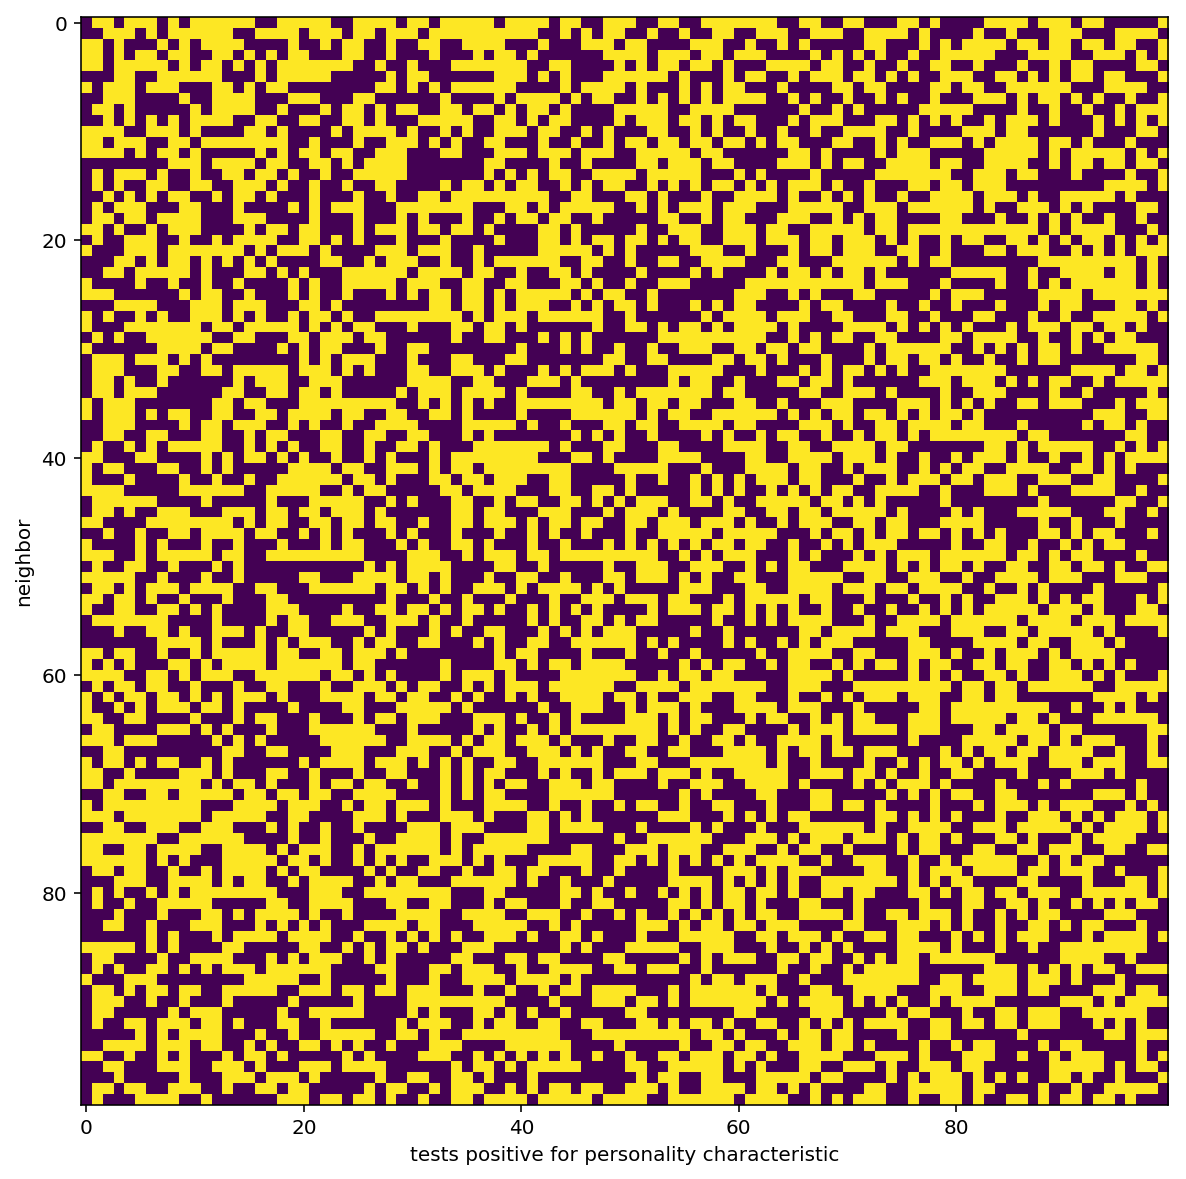

In [633]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow( (X[ix]>50)[0] )
ax.set_ylabel("neighbor")
ax.set_xlabel("tests positive for personality characteristic")

The 100 nearest neighbors seem to have nothing in common!!

In this example, in order to correctly classify a test point, there would need to be a point in the training set that has the **exact same combination of 100 personality characteristics**. If our training set were uniformly spaced we would need:

In [664]:
2**1 # for one personality charactersitics

2

In [665]:
2**2 # for two personality charactersitics

4

In [667]:
2**6 # for six personality charactersitics

64

In [668]:
2**100 # for one hundred personality charactersitics

1267650600228229401496703205376

The training set would have to be impractically large to contain a training point which would help us classify any given test point.

Forgive me to coin a phrase: **special snowflake syndrome**. If you consider a sample along enough dimensions, it is impractical to gather a training set in which it is likely that any other samples will be meaningfully close to it. Your samples become lonely special snowflakes.

## How to conquer the curse of dimensionality
### Collect more data
This is only practical for relatively low dimensions. For 15 dimensions, you can get good coverage over every dimension. For 1000 dimensions, collecting on the order of $2^{1000}$ is impractical.
### Reduce dimensionality
What if the information from 100 personality characteristics could be faithfully captured in 10? What if we don't need to know everything about a house to know how much it'll cost? This is a common way to reduce dimensionality to a tractable level.
### Rely on the Blessing of Non-Uniformity
Often a combination of non-unformity and correlation among features eliminates the problems associated with dimensionality without having to do anything at all. In fact, this is so common that the "curse of dimensionality" is often not a problem.
### Sometimes you can't
If your features are high-dimensional, have interactions, are uniformly distributed, and aren't strongly correlated, sometimes the learning task is simply intractable. Processes that you think of as "random" have these properties. For example, whether or not someone will develop stomach cancer; whether or not someone will get a job; whether or not a plane will crash. These processes may be completely deterministic, but developing a model of the interactions between all features would be intractable.

## The Blessing of non-uniformity

In [844]:
from sklearn.datasets import make_classification

In [895]:
n_feats = 100
n_useful = 5
n_redundant =n_feats-n_useful

scalefactor = 3.0
X, y = make_classification(n_samples=10000, 
                           n_features=n_feats, 
                           n_informative=n_useful, 
                           n_redundant=n_redundant,
                           scale=scalefactor,shift=50/scalefactor)

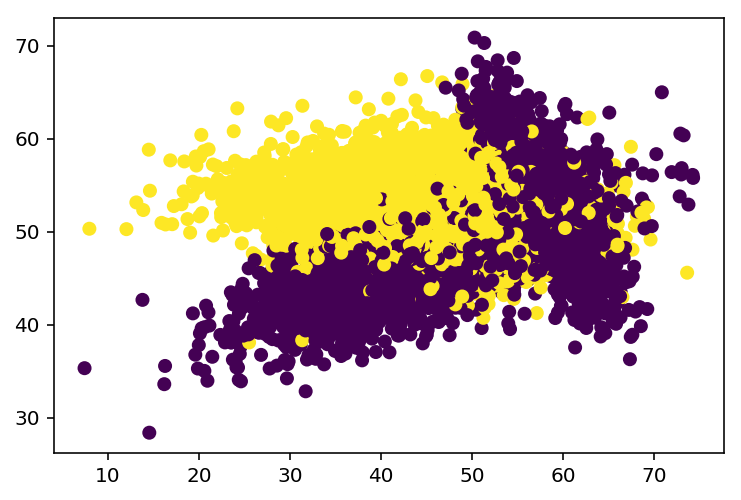

In [899]:
plt.scatter(X[:,0], X[:,9], c=y)

In [900]:
# # make an artificial data set

# np.random.seed(42)

# n_samples = 10000
# n_features = 100

# cov = np.random.uniform(1.0, 1.0, size=(n_features,n_features))
# cov = np.maximum(cov, cov.T) # make covariance matrix symmetrical
# cov[np.eye(n_features,dtype=bool)] = 30

# X = np.random.multivariate_normal(50*np.ones(n_features), cov, size=n_samples)
# y = np.logical_xor.reduce( X>50, axis=1 )

In [901]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [911]:
knn = KNeighborsClassifier(n_neighbors=20)

In [912]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [913]:
yhat = knn.predict(X_test)

In [914]:
accuracy_score(y_test, yhat)

0.9716

In [915]:
x_0 = X_test[0]
x_0

array([60.40765611, 52.58083573, 48.26598078, 48.520717  , 44.0362503 ,
       53.01463264, 43.82959067, 54.93729467, 56.33067489, 49.09246663,
       47.81713833, 47.51951637, 42.19849869, 56.41247799, 41.41324958,
       53.19768475, 57.72910768, 45.53931726, 42.81580266, 52.85175574,
       46.76212199, 55.13578081, 56.42378284, 47.67769104, 45.62685716,
       52.55443368, 57.19229252, 54.28986717, 43.65229721, 55.28354135,
       44.73772009, 49.25931844, 42.31772894, 47.91942042, 58.85661148,
       56.17179235, 42.52924694, 49.94406779, 50.85798488, 52.70629927,
       51.92711336, 48.52816909, 40.15607361, 49.58500869, 60.49349175,
       51.41995337, 52.5699858 , 40.7581722 , 44.6213235 , 57.49519011,
       44.57007604, 48.47203759, 56.03558582, 51.58046265, 49.78381087,
       57.36444796, 48.55559404, 57.40622929, 54.5533894 , 41.60063061,
       53.21158608, 41.41400998, 46.97430069, 53.31852614, 51.37198228,
       40.18954056, 48.26223387, 43.27799269, 53.53144178, 51.35

In [920]:
dists, ix = knn.kneighbors([x_0], 100)

Text(0.5, 1.0, 'Feature magnitude for 100 nearest neighbors')

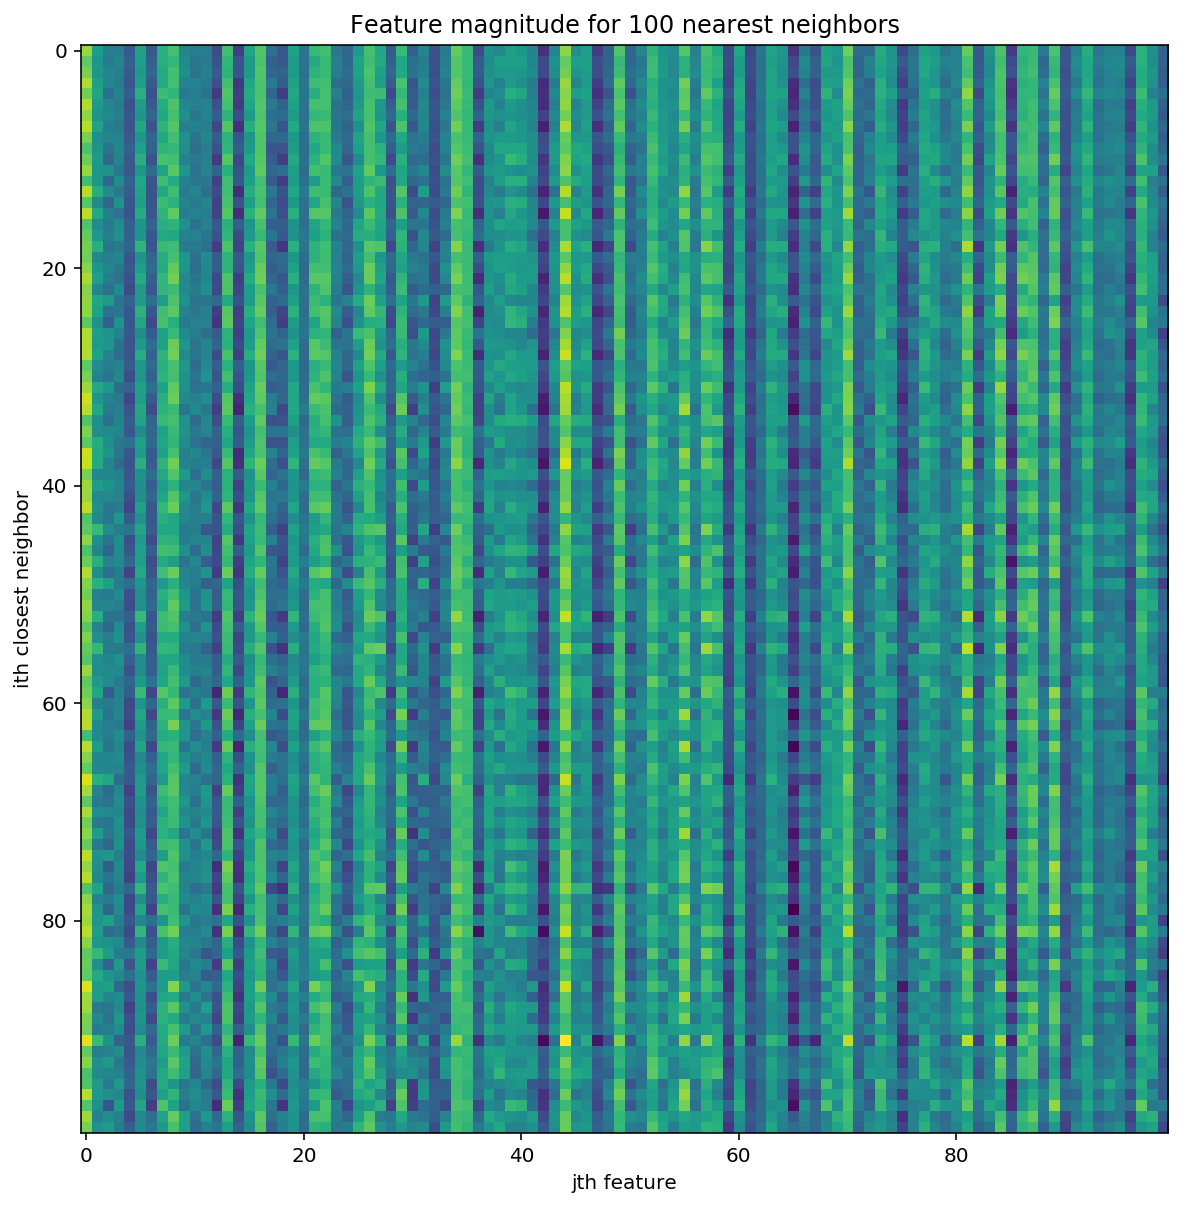

In [931]:
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow( X_train[ix][0] )
ax.set_ylabel("ith closest neighbor")
ax.set_xlabel("jth feature")
ax.set_title("Feature magnitude for 100 nearest neighbors")

### A real-world example

In [941]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

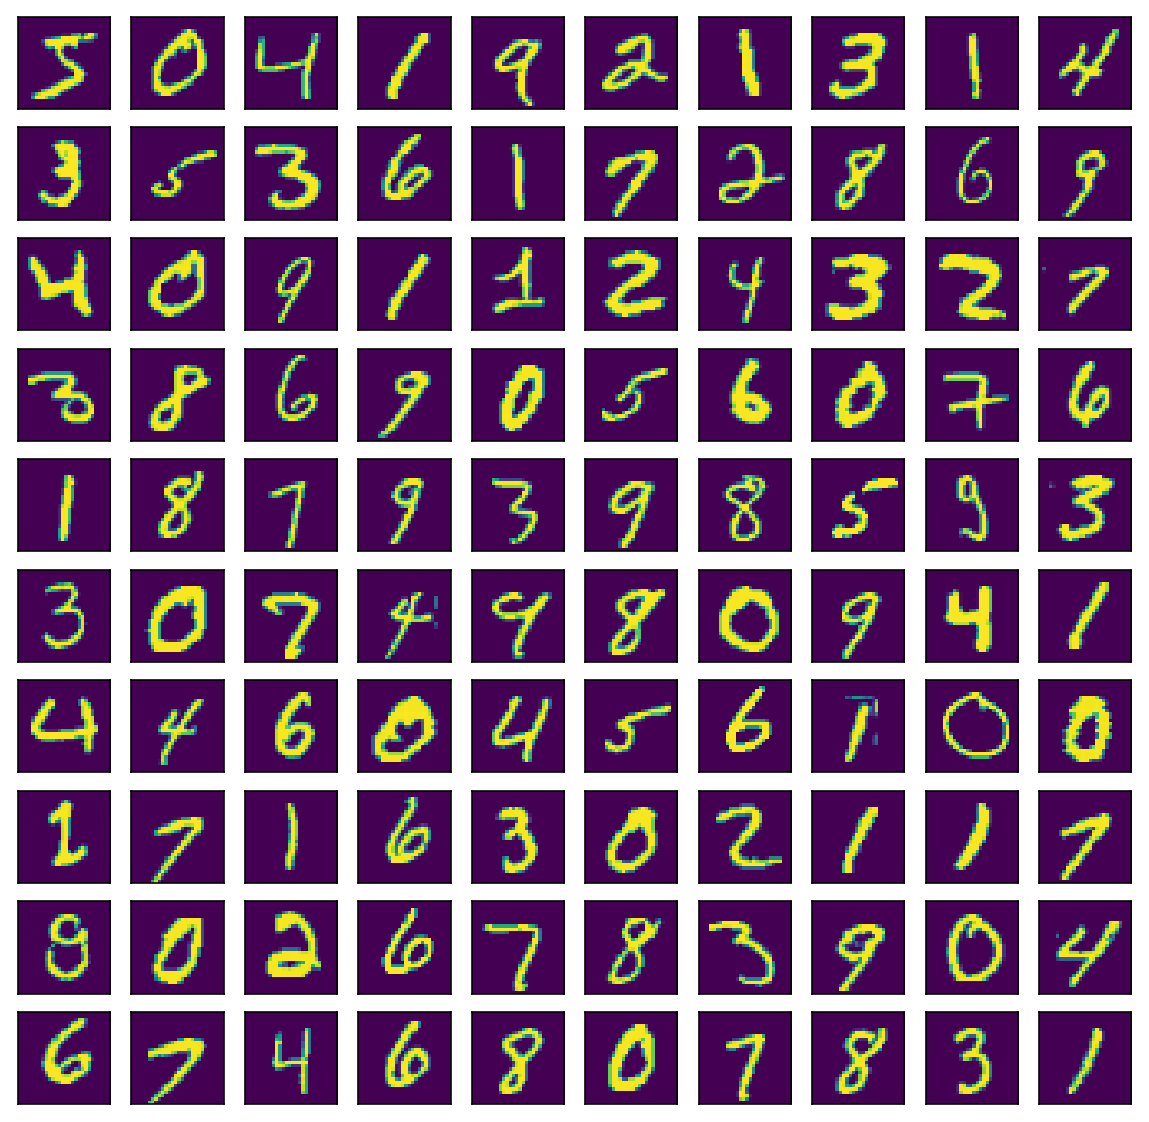

In [942]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
k = 0
for i in range(10):
    for j in range(10):
        ax = axs[i][j]
        ax.set_xticks([])
        ax.set_yticks([])
        
        ax.imshow( X_train[k] )
        k += 1

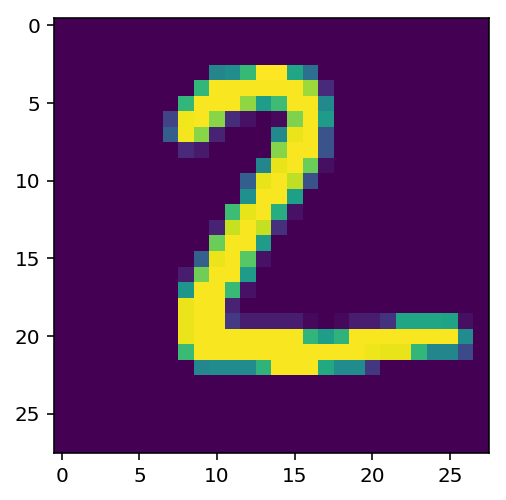

In [943]:
sample_ix = 1

plt.imshow( X_test[sample_ix] )

In [944]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [946]:
knn = KNeighborsClassifier()
knn.fit(X_train_flat, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [947]:
dist, idx = knn.kneighbors(X_test_flat[sample_ix:sample_ix+1], n_neighbors=100)
idx = idx[0]

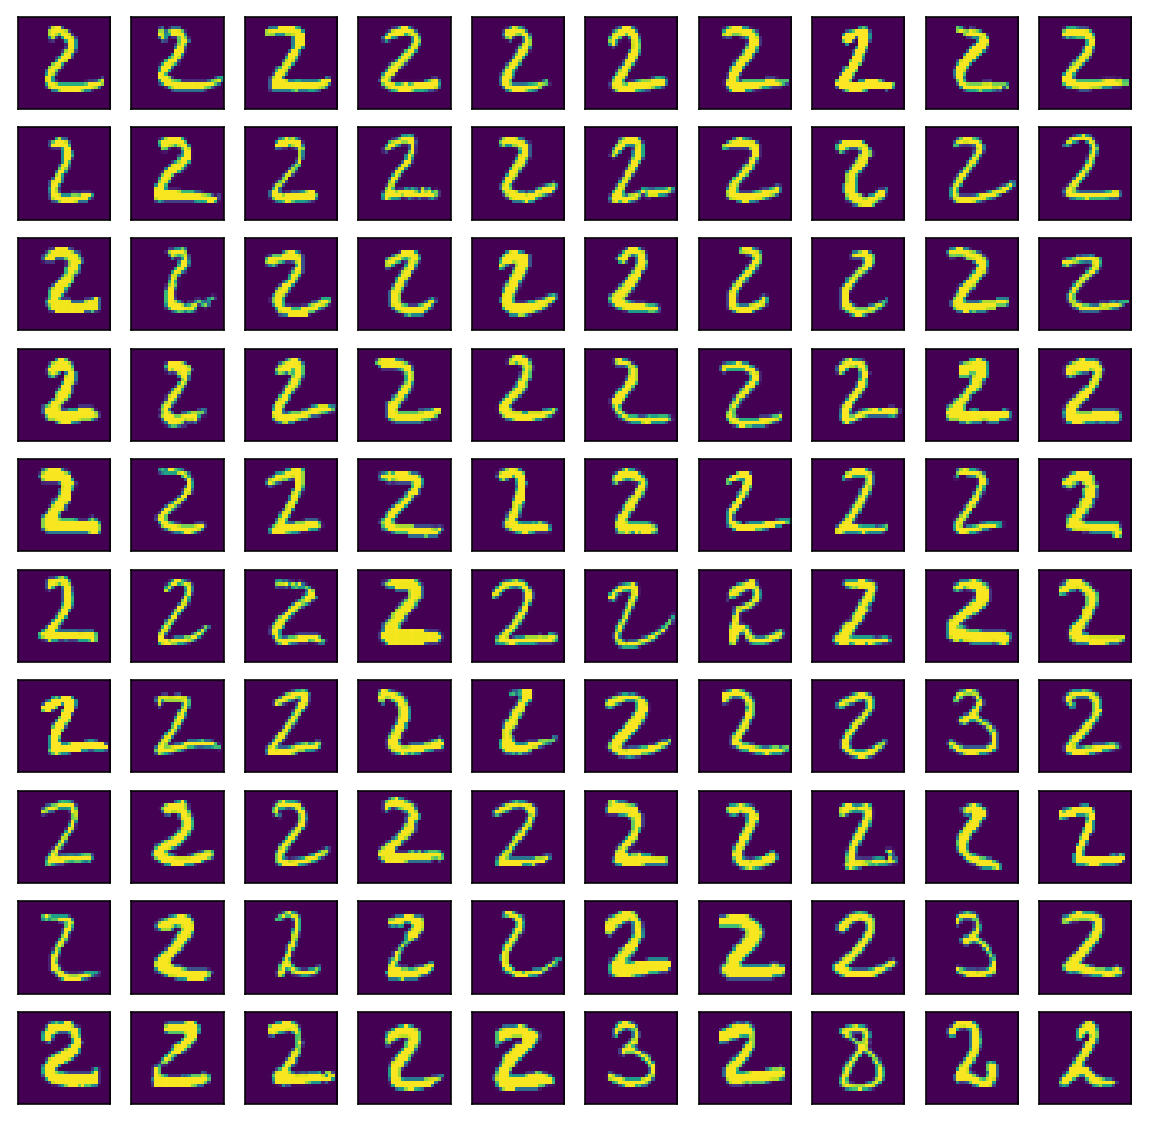

In [948]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
k = 0
for i in range(10):
    for j in range(10):
        ax = axs[i][j]
        ax.set_xticks([])
        ax.set_yticks([])
        
        ax.imshow( X_train[ idx[k] ] )
        k += 1

In many high-dimensional datasets, the features are both correlated and non-uniform. Consequently, the nearest neighbors will in fact be meaningful and distances-based techniques will perform relatively well.